In [2]:
import numpy as np
import h5py
import pickle
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# goal is to get batches of from a training and test set with equal distribution of classes
# the shape of batch[0] and batch[1] should be like:  (examples, 450 * 600 * 3), (examples, 4)
for i in range(83):
    with h5py.File('num_arr.h5', 'a') as na:
        with h5py.File('onehot_numpy.h5', 'a') as on:
            print('starting',i)
            arr = np.array(na.get('arr'+str(i)))
            arrcrop = arr[:,:,70:530,:]
            onehot = np.array(na.get('onehot'+str(i)))
            on.create_dataset('numpy'+str(i),data=arrcrop,compression="gzip",compression_opts=9)
            on.create_dataset('onehot'+str(i),data=onehot,compression="gzip",compression_opts=9)
            print('finished',i)

starting 0
finished 0
starting 1
finished 1
starting 2
finished 2
starting 3
finished 3
starting 4
finished 4
starting 5
finished 5
starting 6
finished 6
starting 7
finished 7
starting 8
finished 8
starting 9
finished 9
starting 10
finished 10
starting 11
finished 11
starting 12
finished 12
starting 13
finished 13
starting 14
finished 14
starting 15
finished 15
starting 16
finished 16
starting 17
finished 17
starting 18
finished 18
starting 19
finished 19
starting 20
finished 20
starting 21
finished 21
starting 22
finished 22
starting 23
finished 23
starting 24
finished 24
starting 25
finished 25
starting 26
finished 26
starting 27
finished 27
starting 28
finished 28
starting 29
finished 29
starting 30
finished 30
starting 31
finished 31
starting 32
finished 32
starting 33
finished 33
starting 34
finished 34
starting 35
finished 35
starting 36
finished 36
starting 37
finished 37
starting 38
finished 38
starting 39
finished 39
starting 40
finished 40
starting 41
finished 41
starting 42


In [3]:
with h5py.File('onehot_numpy.h5', 'a') as on:
    print(list(on.keys()))
   # arr = np.array(on.get('numpy1'))
    #print(arr.shape)

['numpy0', 'numpy1', 'numpy10', 'numpy11', 'numpy12', 'numpy13', 'numpy14', 'numpy15', 'numpy16', 'numpy17', 'numpy18', 'numpy19', 'numpy2', 'numpy20', 'numpy21', 'numpy22', 'numpy23', 'numpy24', 'numpy25', 'numpy26', 'numpy27', 'numpy28', 'numpy29', 'numpy3', 'numpy30', 'numpy31', 'numpy32', 'numpy33', 'numpy34', 'numpy35', 'numpy36', 'numpy37', 'numpy38', 'numpy39', 'numpy4', 'numpy40', 'numpy41', 'numpy42', 'numpy43', 'numpy44', 'numpy45', 'numpy46', 'numpy47', 'numpy48', 'numpy49', 'numpy5', 'numpy50', 'numpy51', 'numpy52', 'numpy53', 'numpy54', 'numpy55', 'numpy56', 'numpy57', 'numpy58', 'numpy59', 'numpy6', 'numpy60', 'numpy61', 'numpy62', 'numpy63', 'numpy64', 'numpy65', 'numpy66', 'numpy67', 'numpy68', 'numpy69', 'numpy7', 'numpy70', 'numpy71', 'numpy72', 'numpy73', 'numpy74', 'numpy75', 'numpy76', 'numpy77', 'numpy78', 'numpy79', 'numpy8', 'numpy80', 'numpy81', 'numpy82', 'numpy9', 'onehot0', 'onehot1', 'onehot10', 'onehot11', 'onehot12', 'onehot13', 'onehot14', 'onehot15', 'o

In [15]:
unable,normal,mild,severe = 0,0,0,0
zeros = np.zeros((450,460,3))
zeros = np.expand_dims(zeros,axis=0)
print(zeros.shape)      

(1, 450, 460, 3)


In [ ]:

with h5py.File('onehot_numpy.h5', 'a') as on:
    #on.create_dataset("severe", data = zeros, compression="gzip", compression_opts=9)
    for i in range(83):
        print('Array',i)
        onehot = np.array(on.get('onehot'+str(i)))
        rows,_ = onehot.shape
        zeros = np.zeros((450,460,3))
        zeros = np.expand_dims(zeros,axis=0)
        for j in range(rows):
            if np.argmax(onehot[j]) == 3:
                print("found one",j)
                addarr = np.expand_dims(np.array(on.get('numpy'+str(i))[j]),axis=0)
                zeros = np.append(zeros,addarr,axis=0)
        print('save')
        zeros = np.delete(zeros,0,0)
        on.create_dataset("severe"+str(i), data = zeros, compression="gzip", compression_opts=9)
                

(1, 450, 460, 3)
Array 16
found one 21
found one 22
found one 27
found one 28
found one 59
found one 60
found one 69
found one 70
found one 75
found one 76
found one 77
found one 78
found one 115
found one 116
found one 189
found one 190
found one 257
found one 258
found one 385
found one 386
found one 433
found one 434
save
Array 17
found one 5
found one 6
found one 19
found one 20
found one 27
found one 28
found one 43
found one 44
found one 81
found one 82
found one 135
found one 136
found one 183
found one 184
found one 199
found one 200
found one 299
found one 300
found one 329
found one 330
found one 347
found one 348
found one 397
found one 398
found one 445
found one 446
found one 461
found one 462
found one 481
found one 482
save
Array 18
found one 133
found one 134
found one 137
found one 138
found one 139
found one 140
found one 175
found one 176
found one 205
found one 206
found one 231
found one 232
found one 241
found one 242
found one 291
found one 292
found one 363
foun

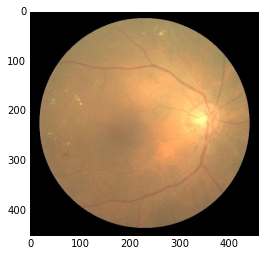

In [18]:
plt.imshow(arr[155])